In [1]:
import numpy as np

In [2]:
from numpy.polynomial import Polynomial

class CKKSEncoder:
    """Basic CKKS encoder to encode complex vectors into polynomials."""
    
    def __init__(self, M: int):
        """Initialization of the encoder for M a power of 2. 
        
        xi, which is an M-th root of unity will, be used as a basis for our computations.
        """
        self.xi = np.exp(2 * np.pi * 1j / M)
        self.M = M
        
    @staticmethod
    def vandermonde(xi: np.complex128, M: int) -> np.array:
        """Computes the Vandermonde matrix from a m-th root of unity."""
        
        N = M //2
        matrix = []
        # We will generate each row of the matrix
        for i in range(N):
            # For each row we select a different root
            root = xi ** (2 * i + 1)
            row = []

            # Then we store its powers
            for j in range(N):
                row.append(root ** j)
            matrix.append(row)
        return matrix
    
    def sigma_inverse(self, b: np.array) -> Polynomial:
        """Encodes the vector b in a polynomial using an M-th root of unity."""

        # First we create the Vandermonde matrix
        A = CKKSEncoder.vandermonde(self.xi, self.M)

        # Then we solve the system
        coeffs = np.linalg.solve(A, b)

        # Finally we output the polynomial
        p = Polynomial(coeffs)
        return p

    def sigma(self, p: Polynomial) -> np.array:
        """Decodes a polynomial by applying it to the M-th roots of unity."""

        outputs = []
        N = self.M //2

        # We simply apply the polynomial on the roots
        for i in range(N):
            root = self.xi ** (2 * i + 1)
            output = p(root)
            outputs.append(output)
        return np.array(outputs)

In [4]:
d = np.array([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0667, 0.1843, 0.1843, 0.1843, 0.0627, 0.5059, 0.3333,
           0.1843, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.2941,
           0.6000, 0.8510, 0.9922, 0.9922, 0.9922, 0.8431, 0.9647, 0.9922,
           0.9922, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.1373, 0.5569, 0.9569, 0.9882,
           0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922,
           0.9922, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.2471, 0.9922, 0.9922, 0.9922,
           0.9922, 0.9922, 0.9922, 0.9922, 0.8353, 0.6667, 0.6667, 0.6667,
           0.6667, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0784, 0.5176, 0.2824, 0.0000, 0.2235, 0.9333, 0.8902, 0.9333,
           0.6588, 0.4863, 0.2706, 0.0784, 0.0431, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0431,
           0.8078, 0.9922, 0.3059, 0.0000, 0.0000, 0.1255, 0.0000, 0.1176,
           0.0078, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0235, 0.6941,
           0.9922, 0.5176, 0.0392, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0471, 0.5216, 0.9922,
           0.9137, 0.0588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3608, 0.9922, 0.8745,
           0.1098, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5882, 0.9922, 0.6824,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.9176, 0.9922, 0.9647,
           0.4980, 0.1922, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0000, 0.9922, 0.9922,
           0.9922, 0.9843, 0.5765, 0.3569, 0.4745, 0.3333, 0.1647, 0.1647,
           0.3333, 0.1098, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.5451, 0.9922, 0.9922,
           0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922,
           0.9922, 0.9098, 0.6588, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0118, 0.2078, 0.8549,
           0.8706, 0.9843, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922, 0.9922,
           0.9922, 0.9922, 0.9882, 0.4863, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.2627, 0.2824, 0.7843, 0.9922, 0.9922, 0.9922, 0.9922,
           0.9922, 0.9922, 0.9922, 0.6863, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.4706, 0.9922, 0.9765, 0.5961, 0.2000,
           0.6431, 0.9922, 0.9922, 0.6863, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.1961, 0.9922, 0.9922, 0.9922, 0.7373,
           0.9882, 0.9922, 0.9922, 0.5804, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0353, 0.6549, 0.9922, 0.9922, 0.9922,
           0.9922, 0.9804, 0.6863, 0.0431, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0902, 0.7059, 0.9059, 0.9922,
           0.8667, 0.5020, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.3647, 0.5843,
           0.0863, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000]])
_ = 0

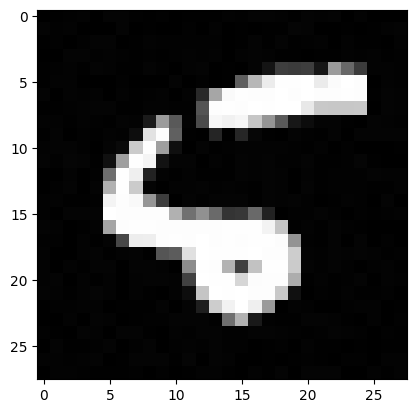

In [5]:

import matplotlib.pyplot as plt
import numpy as np

magnitude = 0.01

# Generate a matrix of small random values with the same shape as `d`
random_values = np.random.uniform(-magnitude, magnitude, size=d.shape)

# Create a 2D array of numbers
array = d +  random_values

# Plot the array as an image
plt.imshow(array, cmap='Greys_r', interpolation='none')
plt.show()

In [6]:
encoder1 = CKKSEncoder(28*2)
enc_row = []
for row in array:
    p = encoder1.sigma_inverse(row).coef
    enc_row.append(p)


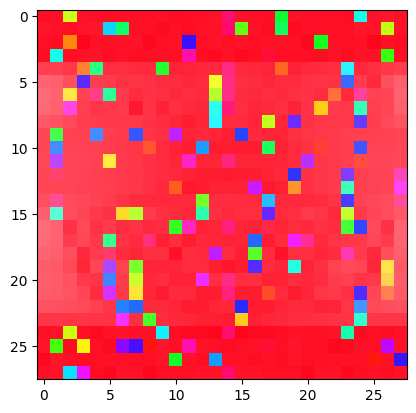

In [7]:
def complex_to_color(z):
    magnitude = np.abs(z)
    phase = np.angle(z)
    hue = (phase + 0.8*np.pi) % (2 * np.pi)  # normalize phase to [0, 2π]
    saturation = 1/(np.power(magnitude,0.4)+1) # normalize magnitude to [0, 1]
    return plt.cm.hsv(hue, saturation)

plt.imshow(complex_to_color(enc_row), interpolation='None' )
plt.show()

In [8]:
enc_row

[array([-7.40675548e-04+5.96311195e-19j, -9.00549934e-04+5.75303504e-04j,
        -1.70121526e-03-1.87378159e-03j, -1.04332567e-03+5.86376234e-04j,
         3.75701793e-04-7.78423040e-04j,  5.49726989e-04-1.09199351e-04j,
        -8.55301733e-04+2.07032518e-05j, -7.08476751e-04-4.17478132e-04j,
         6.21448384e-04+5.29138304e-04j,  1.07083757e-03+9.94817996e-04j,
         3.57500246e-04-5.50204468e-04j, -5.21233152e-04+4.81888657e-04j,
        -7.13106066e-04+1.09376811e-04j, -1.42673500e-03+3.63308229e-04j,
         3.57786717e-18-6.97572963e-04j,  1.42673500e-03+3.63308229e-04j,
         7.13106066e-04+1.09376811e-04j,  5.21233152e-04+4.81888657e-04j,
        -3.57500246e-04-5.50204468e-04j, -1.07083757e-03+9.94817996e-04j,
        -6.21448384e-04+5.29138304e-04j,  7.08476751e-04-4.17478132e-04j,
         8.55301733e-04+2.07032518e-05j, -5.49726989e-04-1.09199351e-04j,
        -3.75701793e-04-7.78423040e-04j,  1.04332567e-03+5.86376234e-04j,
         1.70121526e-03-1.87378159e-03